In [2]:
# 1. Load and Inspect the Dataset
import pandas as pd

# Load My dataset
df = pd.read_csv("creditcard.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (57531, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


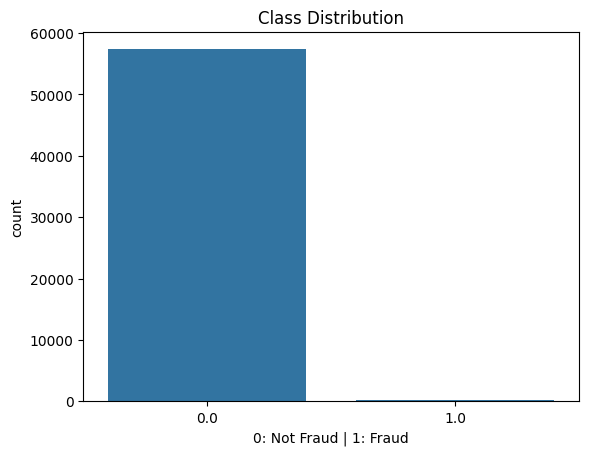

In [4]:
# 2. Balancing the Dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Check class balance
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.xlabel("0: Not Fraud | 1: Fraud")
plt.show()

In [5]:
# 3. Preprocess the Data
from sklearn.preprocessing import StandardScaler

# Inspect the columns
print(df.columns)

# Drop 'Time' column and normalize 'Amount' column
df.drop("Time", axis=1, inplace=True)
df["Amount"] = StandardScaler().fit_transform(df[["Amount"]])

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
# 4. Create a Balanced Dataset
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud)*5, random_state=42)
balanced_df = pd.concat([fraud, non_fraud])
X = balanced_df.drop("Class", axis=1)
y = balanced_df["Class"]

In [7]:
# 5. Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 6. Test Multiple Models to Select the Best One

# Logistic Regression
from sklearn.linear_model import LogisticRegression # Import Logistic Regression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.1]
}

# Initialize and perform Grid Search for XGBoost
xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                   param_grid=xgb_params, scoring='f1', cv=3)
xgb.fit(X_train, y_train)

# Initialize and train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [9]:
# 7. Compare Initial Model Performance

from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
print("Logistic Regression")
print(classification_report(y_test, logreg.predict(X_test)))
logreg_probs = logreg.predict_proba(X_test)[:, 1]
logreg_roc_auc = roc_auc_score(y_test, logreg_probs)
print(f"ROC AUC: {logreg_roc_auc:.2f}\n")

# Random Forest
print("Random Forest")
print(classification_report(y_test, rf.predict(X_test)))
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_probs)
print(f"ROC AUC: {rf_roc_auc:.2f}\n")

# XGBoost
print("XGBoost")
print(classification_report(y_test, xgb_model.predict(X_test)))
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)
print(f"ROC AUC: {xgb_roc_auc:.2f}\n")


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       163
         1.0       1.00      0.93      0.96        28

    accuracy                           0.99       191
   macro avg       0.99      0.96      0.98       191
weighted avg       0.99      0.99      0.99       191

ROC AUC: 1.00

Random Forest
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       163
         1.0       1.00      0.93      0.96        28

    accuracy                           0.99       191
   macro avg       0.99      0.96      0.98       191
weighted avg       0.99      0.99      0.99       191

ROC AUC: 1.00

XGBoost
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       163
         1.0       0.97      1.00      0.98        28

    accuracy                           0.99       191
   macro avg       0.98      1.00      0.99       191
we

In [10]:
# 8. Predict on a Random Transaction
import random
sample = X_test.sample(1, random_state=7)

# Logistic Regression
logreg_pred = logreg.predict(sample)[0]
logreg_prob = logreg.predict_proba(sample)[0][1]
print(f"Logistic Regression Prediction: {'Fraud' if logreg_pred == 1 else 'Not Fraud'}")
print(f"Probability of Fraud (Logistic Regression): {logreg_prob:.2f}")

# Random Forest
rf_pred = rf.predict(sample)[0]
rf_prob = rf.predict_proba(sample)[0][1]
print(f"Random Forest Prediction: {'Fraud' if rf_pred == 1 else 'Not Fraud'}")
print(f"Probability of Fraud (Random Forest): {rf_prob:.2f}")

# XGBoost
xgb_pred = xgb_model.predict(sample)[0]
xgb_prob = xgb_model.predict_proba(sample)[0][1]
print(f"XGBoost Prediction: {'Fraud' if xgb_pred == 1 else 'Not Fraud'}")
print(f"Probability of Fraud (XGBoost): {xgb_prob:.2f}")



Logistic Regression Prediction: Not Fraud
Probability of Fraud (Logistic Regression): 0.00
Random Forest Prediction: Not Fraud
Probability of Fraud (Random Forest): 0.00
XGBoost Prediction: Not Fraud
Probability of Fraud (XGBoost): 0.00
